# Images with Significant Background

**Scott Prahl**

**May 2020, Version 4**

It is common to have images with significant background.  These images were all collected by students trying to do a $M^2$ experiment.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

# pixel size in mm for the camera
pixel_size_mm = 3.75/1000

def plot_beam_fit(image, pixel_size_mm=None, vmax=None):
    
    v,h = image.shape
    xc, yc, dx, dy, phi = lbs.beam_size(image)
    if vmax is None:
        vmax = image.max()

    if pixel_size_mm is None:
        plt.imshow(image, cmap='gist_ncar', vmax=vmax)
        pixel_size_mm = 1
        plt.xlabel('Pixels')
        plt.ylabel('Pixels')
    else:
        plt.imshow(image, extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gist_ncar', vmax=vmax)
        plt.xlabel('Position (mm)')
        plt.ylabel('Position (mm)')

    xp,yp = lbs.axes_arrays(xc, yc, dx, dy, phi)
    plt.plot(xp*pixel_size_mm, yp*pixel_size_mm, ':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc, yc, dx, dy, phi)
    plt.plot(xp*pixel_size_mm, yp*pixel_size_mm,':y')

    # show ellipse around beam
    xp,yp = lbs.rotated_rect_arrays(xc, yc, dx, dy, phi)
    plt.plot(xp*pixel_size_mm, yp*pixel_size_mm,'w')

    plt.xlim(0,h*pixel_size_mm)
    plt.ylim(v*pixel_size_mm,0)

### First import the 16 images

In [2]:
# array of distances at which images were collected
z2 = [200,300,400,420,470,490,500,520,540,550,570,590,600,650,700,800] #mm

# array of filenames associated with each image
fn2 = ["k-%dmm.png" % number for number in z2]

# read them all into memory 
test_img = [imageio.imread(fn) for fn in fn2]

### Find beam sizes for each image using default settings

The `lbs.beam_size()` algorithm works on most files without modification.

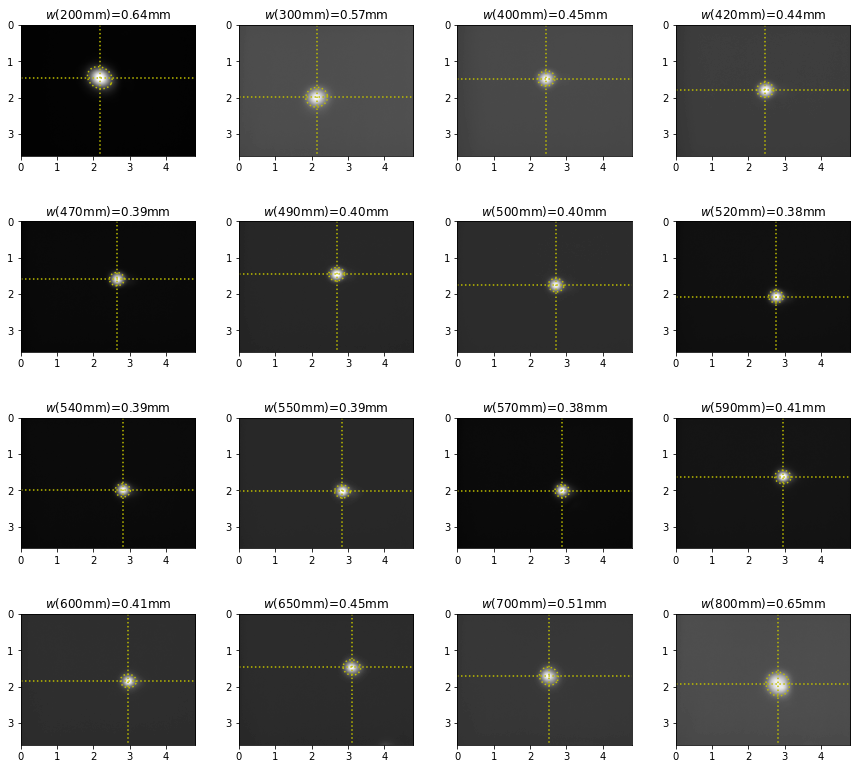

In [3]:
num  = len(z2)
rows = 4
cols = 4
f, axs = plt.subplots(rows,cols,figsize=(15,10))

for i in range(num):
    plt.subplot(rows,cols,i+1)

    # show the beam image with actual dimensions on the axes
    v,h=test_img[i].shape
    plt.imshow(test_img[i], extent=[0,h* pixel_size_mm,v* pixel_size_mm,0], cmap='gray')

    # find the beam center and show it
    xc, yc, dx, dy, phi = lbs.beam_size(test_img[i])
    plt.plot([xc* pixel_size_mm,xc* pixel_size_mm],[0,v* pixel_size_mm],':y')
    plt.plot([0,h* pixel_size_mm],[yc* pixel_size_mm,yc* pixel_size_mm],':y')

    # show ellipse around beam
    xp,yp = lbs.ellipse_arrays(xc,yc,dx,dy,phi)
    plt.plot(xp* pixel_size_mm,yp* pixel_size_mm,':y')

    plt.xlim(0,h* pixel_size_mm)
    plt.ylim(v* pixel_size_mm,0)

    # calculate 1/e^2 radius for symmetric beam to label image
    r=np.sqrt((dx**2+dy**2)/2)*pixel_size_mm
    plt.title('$w$(%dmm)=%.2fmm'%(z2[i],r))

plt.subplots_adjust(bottom=0.0, top=1.0, hspace=0.5)
plt.show()

## TEM$_{00}$, TEM$_{01}$, TEM$_{02}$ Images

This shows what happens with higher order mode laser beams.  There are three images for each beam type taken at different distances along the optical axis.

In [4]:
# read in all the images
z = np.array([[140,200,300],[100,200,300],[100,200,300]])#mm

tem = np.empty_like(z, dtype=np.ndarray)
for i in range(z.shape[0]):
    for j in range (z.shape[1]):
        filename = "TEM0%d_%dmm.pgm" % (i, z[i,j])
        tem[i,j] = imageio.imread(filename) >> 4

Plot the images and their fits.  Notice that the rectangles are cropped in some cases.  

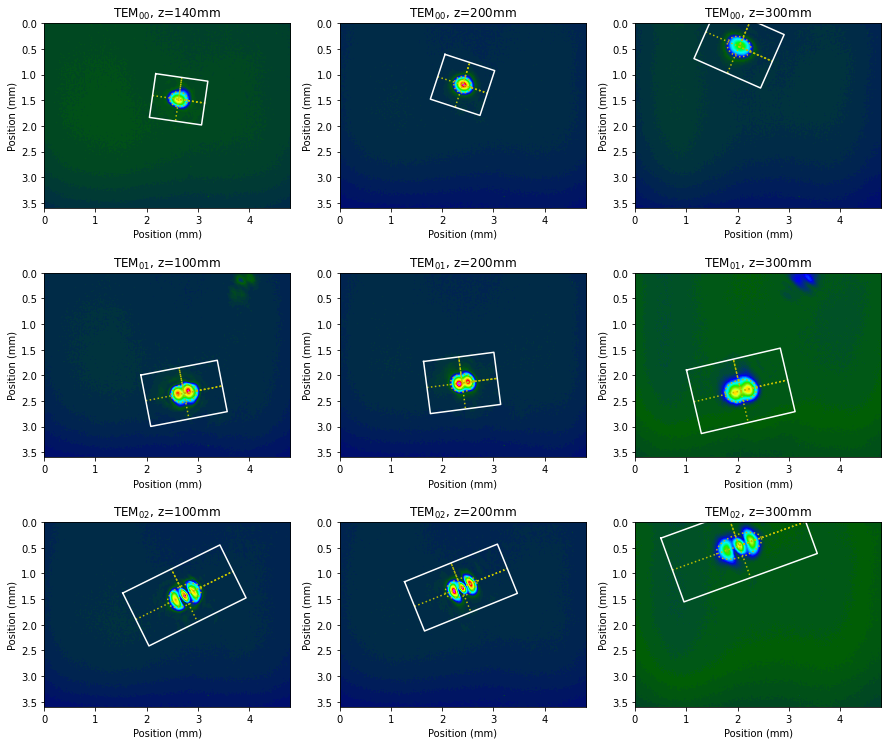

In [5]:
# figure out maximum so all color values match across images
vmax = 0
for i in range(3):
    for j in range(3):
        vmax = max(tem[i,j].max(), vmax)
 
plt.subplots(3, 3, figsize=(15,13))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, i*3 + j+1)
        plot_beam_fit(tem[i,j],pixel_size_mm,vmax)
        plt.title("TEM$_{0%d}$, z=%dmm" % (i, z[i,j]))

plt.show()

Close examination of the higher order mode at 100mm, shows very plausible results.

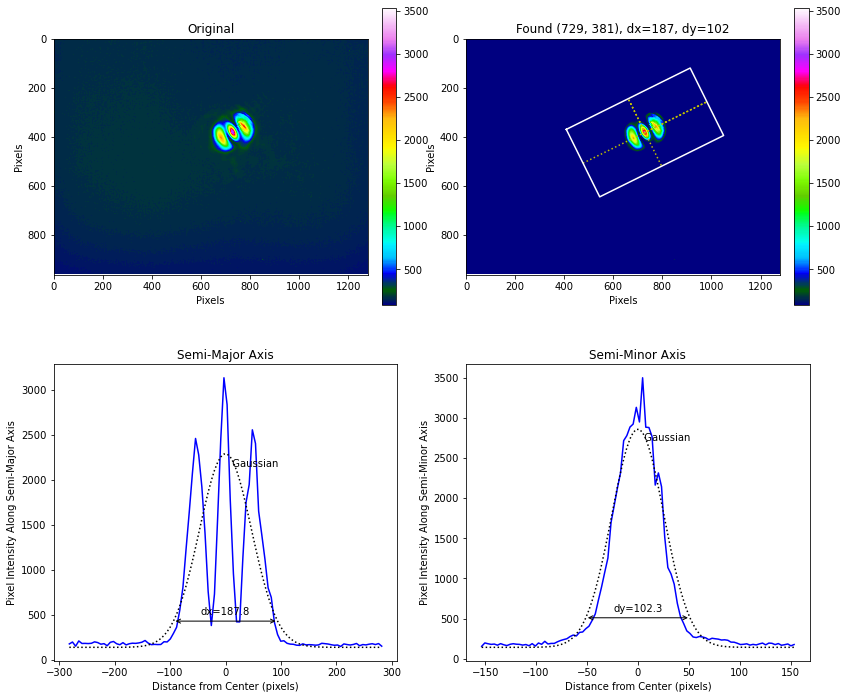

In [6]:
lbs.visual_report(tem[2,0])

However the TEM$_{02}$ beam at 300mm, has much poorer results.  This is because the integration rectangle is cropped and therefore the integration is unbalanced on the two sides.

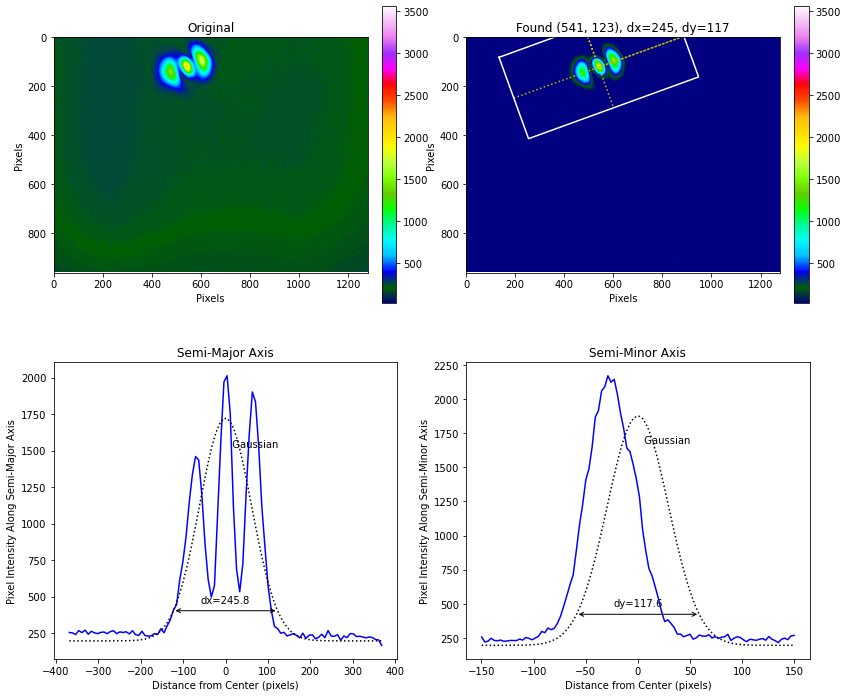

In [7]:
lbs.visual_report(tem[2,2])